## Marketing Channel Analysis
- advise on which marketing strategies to promote

In [2]:
# download packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
import numpy as np

# download datasets
mql = pd.read_csv('data/olist_marketing_qualified_leads_dataset.csv') # mql list
closed_deals = pd.read_csv('data/olist_closed_deals_dataset.csv') # mqls that converted to Olist customers
order_items = pd.read_csv('data/olist_order_items_dataset.csv') # products sold
sellers = pd.read_csv("data/olist_sellers_dataset.csv") # info about sellers

In [3]:
# convert to datetime and add month label for time series analysis
mql['first_contact_date'] = pd.to_datetime(mql['first_contact_date'])
mql['first_contact_month'] = mql['first_contact_date'].dt.to_period("M")
closed_deals['won_date'] = pd.to_datetime(closed_deals['won_date'])
closed_deals['won_month'] = closed_deals['won_date'].dt.to_period("M")

# transforming dataset for analysis
mf = pd.merge(left=closed_deals, right=mql, on='mql_id', how='left') 
mf_items = pd.merge(left=mf, right=order_items, on='seller_id', how='left')
mf_sellers = pd.merge(left=mf, right=sellers, on='seller_id', how='left')

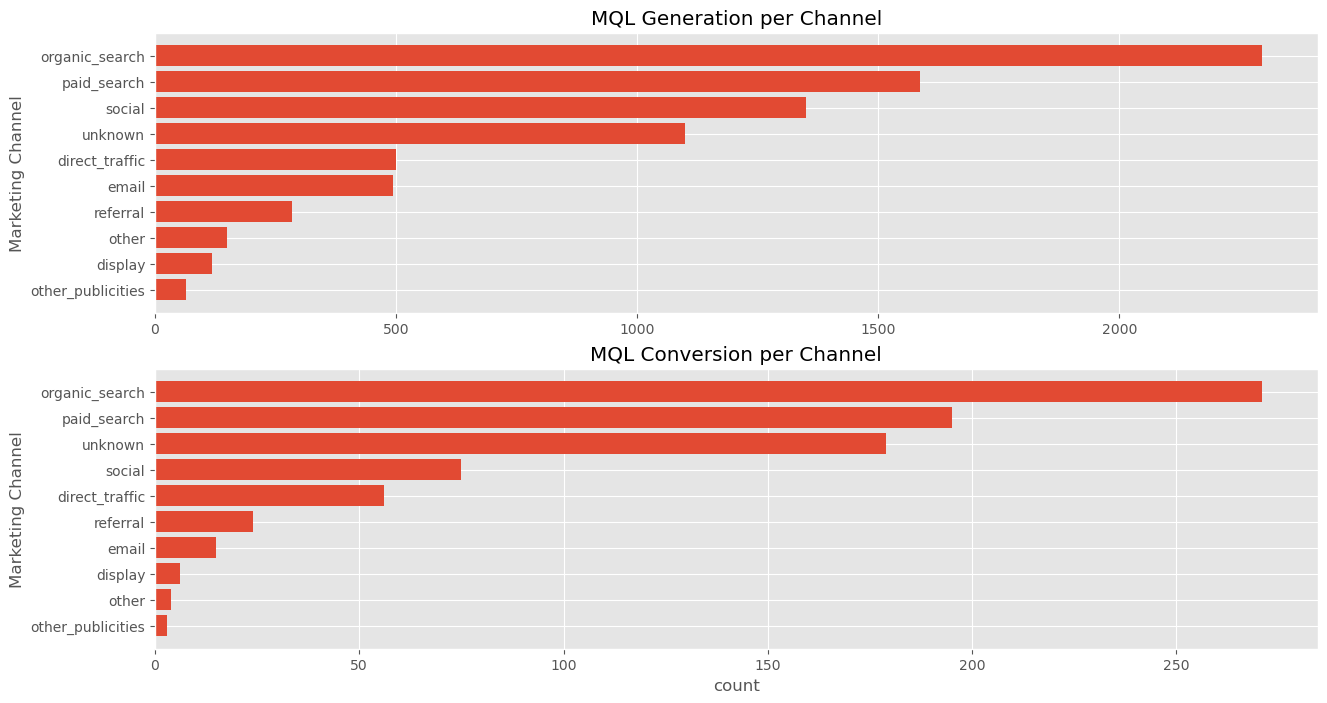

In [4]:
# Volume of MQL per channel
fig, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
ax1.barh(y=mql['origin'].value_counts().index[::-1], width=mql['origin'].value_counts()[::-1])
ax1.set_title("MQL Generation per Channel")
ax1.set_ylabel("Marketing Channel")
#ax1.set_xlabel("count")
#plt.show()

# volume of converted MQL per channel
ax2.barh(y=mf['origin'].value_counts().index[::-1], width=mf['origin'].value_counts()[::-1])
ax2.set_title("MQL Conversion per Channel")
ax2.set_ylabel("Marketing Channel")
ax2.set_xlabel("count")
# save plot
plt.savefig('figures/mql_gen_con_barchart.png')
plt.show()

In [7]:
# generate time period per channel (MQL Generation)
channels = ['organic_search', 'paid_search', 'unknown', 'social', 'direct_traffic']
for channel in channels:
    search = mql.loc[mql['origin']==channel]
    monthly_stats = search.groupby('first_contact_month').count()
    counts = monthly_stats['mql_id'].values
    counts_len = len(counts)
    plt.plot(counts, label=channel)
    plt.xticks(ticks=np.linspace(0,counts_len-1, counts_len), labels=monthly_stats.index, rotation=45)
    #if channel == "unknown":
     #   plt.plot(monthly_stats['mql_id'].values[1:], label=channel)
      #  plt.xticks(ticks=np.linspace(0,10,11), labels=monthly_stats.index[1:], rotation=45)
    #else:
     #   plt.plot(monthly_stats['mql_id'].values, label=channel)
      #  plt.xticks(ticks=np.linspace(0,10,11), labels=monthly_stats.index, rotation=45)
plt.legend()
plt.title("MQL Generation over time per channel")
plt.xlabel("Time Periods (first_contact_month)")
plt.ylabel("count")
# save plot
plt.savefig('figures/mql_gen_time_per_channel')
plt.show()

NameError: name 'channels' is not defined

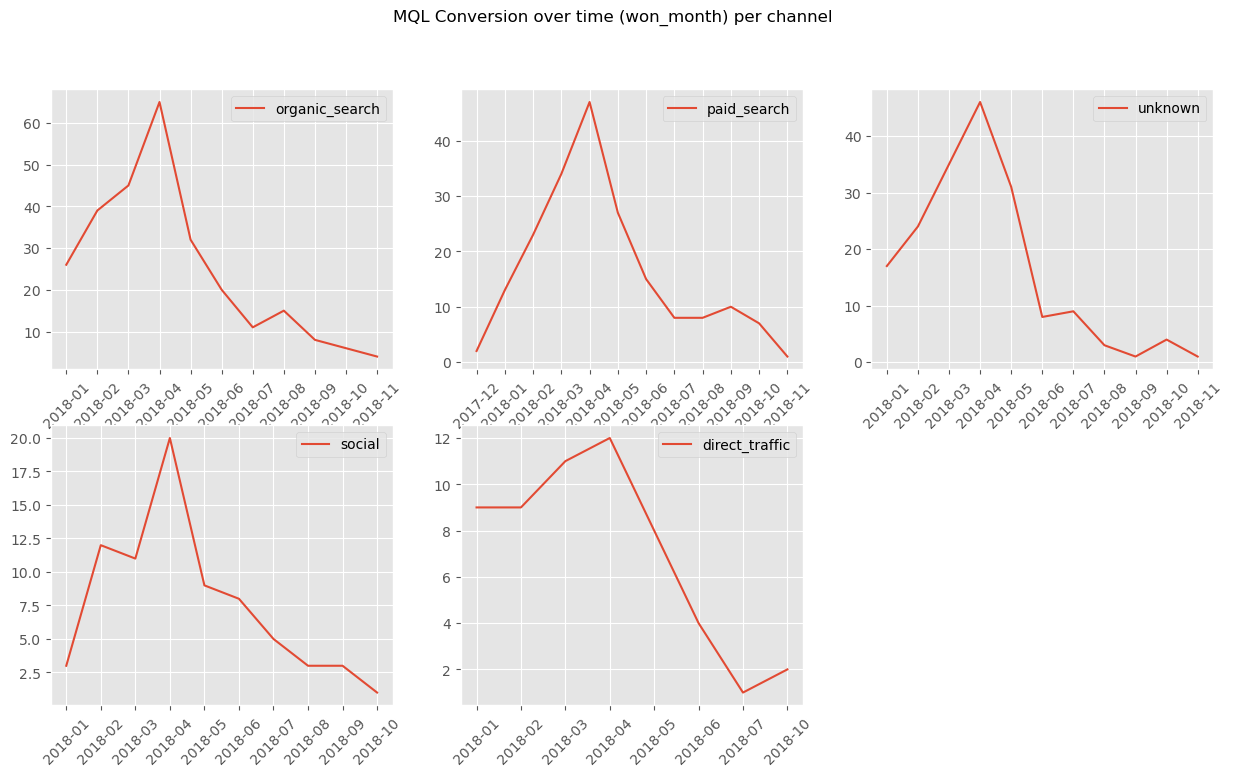

In [ ]:
# generate time period per channel (MQL Generation)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = [ax1, ax2, ax3, ax4, ax5]
channels_gen
for channel, axes in zip(channels, axes):
    search = mf.loc[mf['origin']==channel]
    monthly_stats = search.groupby('won_month').count()
    counts = monthly_stats['mql_id'].values
    counts_len = len(counts)
    axes.plot(counts, label=channel)
    axes.set_xticks(ticks=np.linspace(0,counts_len-1, counts_len), labels=monthly_stats.index, rotation=45)
    axes.legend()
ax6.axis('off')
fig.suptitle('MQL Conversion over time (won_month) per channel')
# save plot
plt.savefig('figures/mql_con_time_per_channel.png')
plt.show()

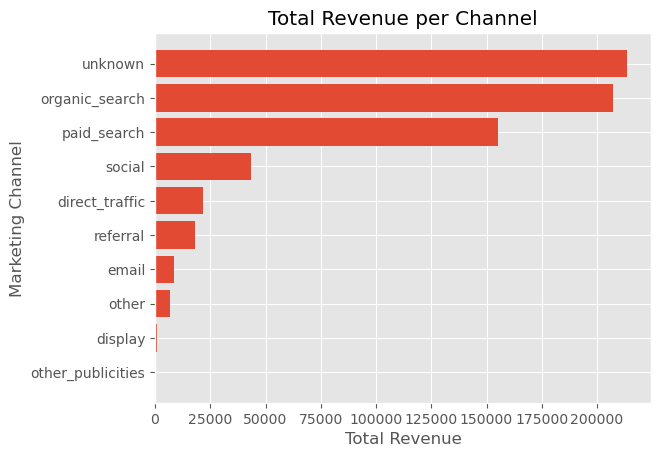

In [6]:
# Produced Revenue by marketing channel
channel_stats = mf_items.groupby(by='origin').sum(numeric_only=True).sort_values(by='price')  # group by marketing channel and compute sum for each column
plt.barh(y=channel_stats.index, width=channel_stats['price'])
plt.title("Total Revenue per Channel")
plt.ylabel("Marketing Channel")
plt.xlabel("Total Revenue")
# save plot
plt.savefig('figures/revenue_per_channel.png', bbox_inches="tight")
plt.show()